### Завдання 1
Проведіть крос-валідацію для моделі, побудованої на основі датафрейму student_scores з попереднього завдання. Обґрунтуйте обраний метод крос-валідації.

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [111]:
stud = pd.read_csv('student_scores.csv')
stud.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [112]:
X = stud[['Hours']]
y = stud['Scores']

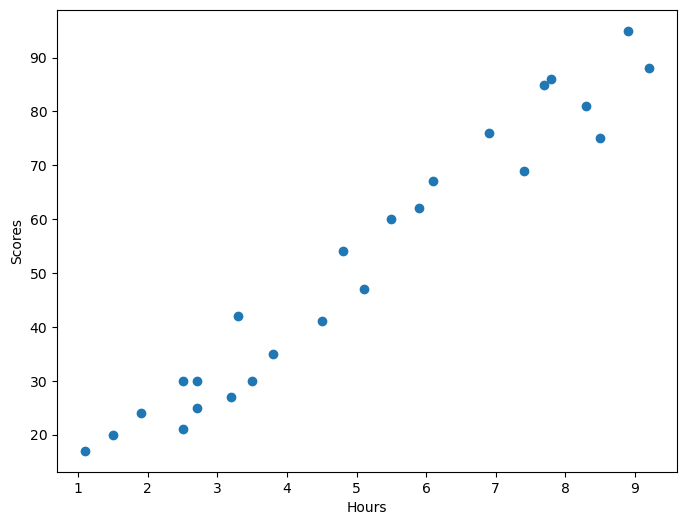

In [113]:
plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [114]:
kf =KFold(n_splits=5, shuffle=True, random_state=5)

print('********************************************************************************************')
print('{}{:^62} {}'.format('Iterations','Training Set(indexes)', 'Testing Set(indexes)'))
print('********************************************************************************************')
count = 1
for train_index, test_index in kf.split(X):
    print(f'Train {count} :', train_index, 'Test:', test_index)
    count += 1


********************************************************************************************
Iterations                    Training Set(indexes)                      Testing Set(indexes)
********************************************************************************************
Train 1 : [ 0  1  3  4  5  6  7  8  9 11 12 13 14 15 16 17 20 22 23 24] Test: [ 2 10 18 19 21]
Train 2 : [ 0  1  2  3  4  6  7  8  9 10 11 13 14 15 16 18 19 20 21 23] Test: [ 5 12 17 22 24]
Train 3 : [ 2  3  4  5  6  7  8  9 10 12 14 15 16 17 18 19 21 22 23 24] Test: [ 0  1 11 13 20]
Train 4 : [ 0  1  2  3  5  6 10 11 12 13 14 15 16 17 18 19 20 21 22 24] Test: [ 4  7  8  9 23]
Train 5 : [ 0  1  2  4  5  7  8  9 10 11 12 13 17 18 19 20 21 22 23 24] Test: [ 3  6 14 15 16]


#### Linear Regression

In [115]:
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
print(f'rmse = {(score.mean()*-1)**0.5}')


Scores for each fold: [-37.56345258 -24.65455431 -24.21050631 -25.58192204 -59.00316609]
rmse = 5.848309180092123


#### Decision Tree Regressor

In [116]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 5), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
print(f'rmse = {(score.mean()*-1)**0.5}')

Scores for each fold: [-117.8   -41.25  -81.    -84.6   -74.2 ]
rmse = 8.931405264570632


#### Random Forest Regressor

In [117]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 5), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
print(f'rmse = {(score.mean()*-1)**0.5}')

Scores for each fold are: [-77.70205014 -23.51407295 -62.97884    -25.71562    -63.43560014]
rmse = 7.1182326911639775


#### Для тренування і оцінювання моделей обрано К-кратну валідацію, оскільки це найпоширеніший метод тренування моделей, а початковий датасет досить простий і невеликий.
#### За підсумками трьох збудованих моделей найкращі результати показує модель лінійної регресії.